# Ch1. Linear Regression

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [194]:
# 환자에게 X를 1000회 투약
N = 1000
idx = np.arange(0, N)
# X1 = torch.zeros(N,1)
X = 10*torch.randn(N,1)
# X = torch.cat([X1, X2], axis=1)
print(X)
Noise = 2*torch.randn(N,1)
# print(X.shape, Noise.shape)

tensor([[-1.4055e+01],
        [ 1.0052e+01],
        [ 7.6823e+00],
        [-5.9244e+00],
        [-1.1479e+01],
        [ 9.1218e+00],
        [ 1.0137e+00],
        [-1.1949e+01],
        [-4.4074e+00],
        [-1.0766e+00],
        [-1.3947e+01],
        [-1.1882e+01],
        [ 6.8805e+00],
        [ 2.0376e-01],
        [ 7.0436e-01],
        [ 1.1010e+01],
        [ 1.7762e+01],
        [ 9.4289e+00],
        [-1.2010e+01],
        [ 4.8042e+00],
        [ 3.3823e+00],
        [-3.1196e-02],
        [-1.8370e+01],
        [-6.5258e+00],
        [ 4.6617e+00],
        [-1.0424e+01],
        [ 2.8753e+01],
        [ 7.5427e+00],
        [ 9.6180e+00],
        [-6.9421e+00],
        [ 2.5402e+00],
        [-1.7261e+00],
        [ 1.1155e+01],
        [-9.9971e+00],
        [-1.0428e+01],
        [ 1.5107e+01],
        [ 4.0578e+00],
        [ 2.7131e+01],
        [ 7.9752e+00],
        [-1.9785e+01],
        [-1.5130e+01],
        [-8.8151e+00],
        [ 1.5348e+01],
        [ 7

(0.0, 1000.0, -50.0, 50.0)

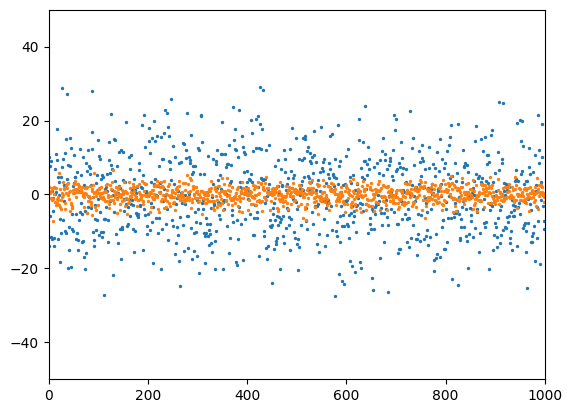

In [195]:
plt.scatter(idx, X, s=2)
plt.scatter(idx, Noise, s=2)
plt.axis([0, N, -50, 50])

In [196]:
# 환자의 혈액검사에서 Y를 측정
# Y = 2 * ((X+noise)**2) + 3 # 2 * (X+Noise) + 3
Y = 2 * (X + Noise) + 3
print(Y.shape)

torch.Size([1000, 1])


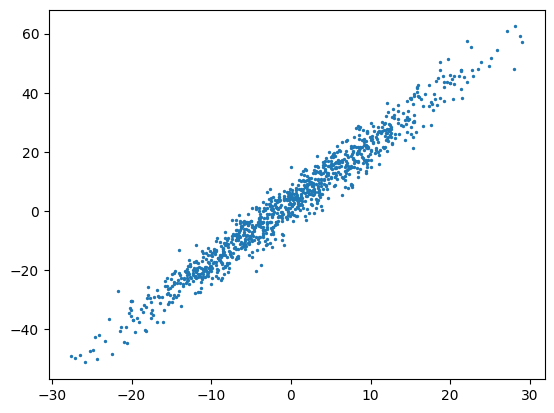

In [197]:
# X 약물에 대한 환자 혈액의 Y 사이에 상관관계
plt.scatter(X, Y, s=2)

In [262]:
linear_w = torch.randn(2, requires_grad=True)
print(linear_w)

import torch.nn as nn
model = nn.Linear(1,1)
model.weight.data = linear_w[0].unsqueeze(0).unsqueeze(0)
model.bias.data = linear_w[1].unsqueeze(0).unsqueeze(0)

tensor([-0.3349,  0.8021], requires_grad=True)


In [263]:
X_linear = torch.cat([X, torch.ones(N,1)], axis=1)
Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)
print(Y_pred.shape)

torch.Size([1000, 1])


In [264]:
out = model(X)
print(out.shape)

torch.Size([1000, 1])


In [265]:
print(Y_pred[0:5,:])
print(out[0:5,:])

tensor([[ 5.5086],
        [-2.5641],
        [-1.7704],
        [ 2.7860],
        [ 4.6462]], grad_fn=<SliceBackward0>)
tensor([[ 5.5086],
        [-2.5641],
        [-1.7704],
        [ 2.7860],
        [ 4.6462]], grad_fn=<SliceBackward0>)


In [324]:
print(linear_w.grad.data)

tensor([-0.0131, -6.9915])


tensor([-0.0645,  2.6430])
[tensor([[-0.0645]]), tensor([[2.6430]])]


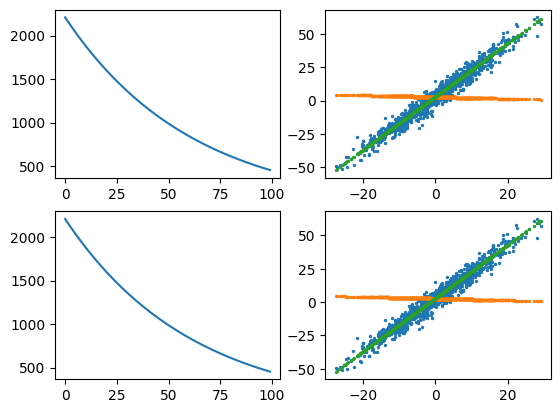

In [386]:
linear_w = torch.randn(2, requires_grad=True)
# print(linear_w)
X_linear = torch.cat([X, torch.ones(N,1)], axis=1)
Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)

import torch.nn as nn
model = nn.Linear(1,1)
model.weight.data = linear_w[0].unsqueeze(0).unsqueeze(0)
model.bias.data = linear_w[1].unsqueeze(0).unsqueeze(0)

# print(torch.cat([Y, Y_pred, Y-Y_pred],1))


gamma = 0.0097
num_epoc = 100

losses1 = []
for epoc in range(num_epoc):
    linear_w.grad = None
    Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)
    loss1 = torch.mean((Y - Y_pred)**2)
    loss1.backward()
    # print(linear_w.data)
    linear_w.data = linear_w.data - gamma * linear_w.grad.data
    # print(linear_w.grad.data, gamma, linear_w.data)
    losses1.append(loss1.item())
    
plt.subplot(2,2,1)
plt.plot(losses1)
print(linear_w.data)

plt.subplot(2,2,2)
Y_pred1 = torch.mv(X_linear, linear_w).unsqueeze(1)
plt.scatter(X, Y, s=2)
plt.scatter(X, Y_pred1.detach(), s=2)
Y_true = 2 * (X) + 3
plt.scatter(X, Y_true, s=2)

# linear_w = torch.randn(2, requires_grad=True)
# # print(linear_w)
# X_linear = torch.cat([X, torch.ones(N,1)], axis=1)
# Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)

# import torch.nn as nn
# model = nn.Linear(1,1)
# model.weight.data = linear_w[0].unsqueeze(0).unsqueeze(0)
# model.bias.data = linear_w[1].unsqueeze(0).unsqueeze(0)

# import torch.nn as nn
# import torch.optim as optim

losses2 = []
# loss_func = nn.L1Loss()
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=gamma)
for i in range(num_epoc):
    optimizer.zero_grad()
    output = model(X)
    # print(output.shape, Y.shape)
    loss = loss_func(output, Y)
    loss.backward()
    optimizer.step()
    losses2.append(loss.item())
    
plt.subplot(2,2,3)
plt.plot(losses2)
print([model.weight.data, model.bias.data])

plt.subplot(2,2,4)
output1 = model(X)
plt.scatter(X, Y, s=2)
plt.scatter(X, output1.detach(), s=2)
Y_true = 2 * (X) + 3
plt.scatter(X, Y_true, s=2)